Total distance: 2032.7899328029123
Average distance: 1.0169034181105114


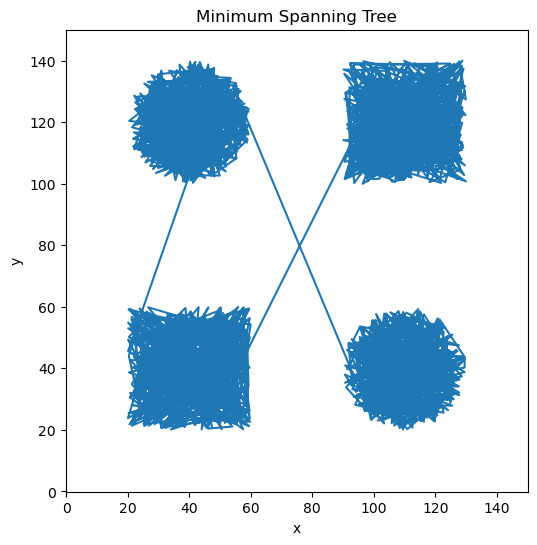

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Read data points from file
data_points = []
with open('data_points2.txt', 'r') as f:
    for line in f:
        x, y = map(float, line.strip().split())
        data_points.append((x, y))

# Compute pairwise distances between points
distances = {}
for i, p1 in enumerate(data_points):
    for j, p2 in enumerate(data_points):
        if j > i:
            d = math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
            distances[(i, j)] = d

# Compute minimum spanning tree using Kruskal's algorithm
edges = list(distances.keys())
edges.sort(key=lambda e: distances[e])
parent = list(range(len(data_points)))
rank = [0] * len(data_points)
mst = []
for e in edges:
    if len(mst) == len(data_points) - 1:
        break
    u, v = e
    pu = parent[u]
    pv = parent[v]
    if pu != pv:
        mst.append(e)
        if rank[pu] > rank[pv]:
            parent[pv] = pu
        elif rank[pu] < rank[pv]:
            parent[pu] = pv
        else:
            parent[pu] = pv
            rank[pv] += 1

# Calculate total and average distance between points in the MST
total_distance = sum(distances[e] for e in mst)
average_distance = total_distance / len(mst)

# Save the data to a text file
with open('avg.txt', 'w') as f:
    f.write(str(average_distance)) 

print("Total distance:", total_distance)
print("Average distance:", average_distance)

fig, ax = plt.subplots(figsize=(6,6))

# Set plot properties
ax.set_aspect('equal')
ax.set_xlim(-0.1, 150.1)
ax.set_ylim(-0.1, 150.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Minimum Spanning Tree')

plt.plot([p[0] for p in data_points], [p[1] for p in data_points])
plt.show()
